In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
import plotly.graph_objects as go
import plotly.offline as iplot
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output# Load Data
from jupyter_dash import JupyterDash
from jupyter_dash import JupyterDash
import plotly.express as px
init_notebook_mode(connected=True)
cf.go_offline()
pd.options.display.float_format = "{:.2f}".format

Modules:
Numpy, Pandas {data analysis}, matplotlib,Seaborn  :{ Basic-Plotting,Themes},
Plotly:{Visual-Plotting},sklearn:{Simple Imputer},cufflinks:{Reading pandas data to plotly and required themes},
dash:{dash_core_components,dash_hrml_components},Jupyter-Das:{To work on dash in jupyter notebook}

In [2]:
cf.getThemes()

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

In [3]:
cf.set_config_file(theme="solar")

In [4]:
#reading csv file 
df_country = pd.read_csv("country-wise-average.csv")


In [5]:
df_country.head()#dataframe of first five rows

,Country,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
0,AFGHANISTAN,0,3.03,10.35,5.12,47.77,30.38,4918.56
1,ALBANIA,2,4.08,7.76,20.80,24.16,7.70,232.86
2,ALGERIA,2,2.73,5.94,12.83,19.57,7.34,3565.21
3,ANGOLA,1,2.40,6.93,2.55,42.63,23.60,3980.05
4,ARGENTINA,2,0.20,2.15,11.12,10.03,2.60,3613.65


In [6]:
pd.set_option('display.max_rows',152)#To print maximum rows assigned by the user

In [7]:
df_country

,Country,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
0,AFGHANISTAN,0,3.03,10.35,5.12,47.77,30.38,4918.56
1,ALBANIA,2,4.08,7.76,20.80,24.16,7.70,232.86
2,ALGERIA,2,2.73,5.94,12.83,19.57,7.34,3565.21
3,ANGOLA,1,2.40,6.93,2.55,42.63,23.60,3980.05
4,ARGENTINA,2,0.20,2.15,11.12,10.03,2.60,3613.65
5,ARMENIA,2,1.60,3.94,13.62,16.12,3.48,204.15
6,AUSTRALIA,3,0.00,0.00,13.88,1.00,0.10,1443.07
7,AZERBAIJAN,2,2.58,5.43,9.18,21.82,8.08,740.50
8,BAHRAIN,3,nan,6.70,7.50,13.75,6.95,63.37
9,BANGLADESH,1,2.81,14.54,0.96,54.23,46.27,15837.43


# Data-Preprocessing

In [8]:
df_country.head(5)

,Country,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
0,AFGHANISTAN,0,3.03,10.35,5.12,47.77,30.38,4918.56
1,ALBANIA,2,4.08,7.76,20.80,24.16,7.70,232.86
2,ALGERIA,2,2.73,5.94,12.83,19.57,7.34,3565.21
3,ANGOLA,1,2.40,6.93,2.55,42.63,23.60,3980.05
4,ARGENTINA,2,0.20,2.15,11.12,10.03,2.60,3613.65


In [9]:
df_country.shape#shape of the dataset

(152, 8)

In [10]:
df_country.columns# columns of the datset 

Index(['Country', 'Income Classification', 'Severe Wasting', 'Wasting',
       'Overweight', 'Stunting', 'Underweight', 'U5 Population ('000s)'],
      dtype='object')

In [11]:
df_country.dtypes# datatypes in the dataset

Country                   object
Income Classification      int64
Severe Wasting           float64
Wasting                  float64
Overweight               float64
Stunting                 float64
Underweight              float64
U5 Population ('000s)    float64
dtype: object

In [12]:
df_country.isnull().sum()#checking if the there is Nan in the data

Country                   0
Income Classification     0
Severe Wasting           12
Wasting                   2
Overweight                3
Stunting                  1
Underweight               2
U5 Population ('000s)     0
dtype: int64

In [13]:
df_country.describe()#Descriptive Stats before Imputation


,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
count,152.00,140.00,150.00,149.00,151.00,150.00,152.00
mean,1.43,2.17,6.60,7.20,25.81,13.50,4042.93
std,0.97,1.71,4.48,4.65,14.69,10.90,13164.19
min,0.00,0.00,0.00,0.96,1.00,0.10,1.00
25%,1.00,0.90,3.26,3.85,13.48,4.30,241.77
50%,1.00,1.87,5.71,6.30,24.16,10.38,981.23
75%,2.00,2.82,8.74,9.08,36.56,19.50,3002.43
max,3.00,11.40,23.65,26.50,57.60,46.27,123014.49


# Imputation

In [14]:
df_country= df_country.dropna(subset = ['Wasting', 'Overweight', 'Stunting', 'Underweight'])



df_country['Severe Wasting'].fillna(df_country['Severe Wasting'].mean(), inplace=True)


#Imputation Process for Severe Wasting with more null values

In [15]:
df_country.isnull().sum()#checking null values after imputation

Country                  0
Income Classification    0
Severe Wasting           0
Wasting                  0
Overweight               0
Stunting                 0
Underweight              0
U5 Population ('000s)    0
dtype: int64

In [16]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 151
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                148 non-null    object 
 1   Income Classification  148 non-null    int64  
 2   Severe Wasting         148 non-null    float64
 3   Wasting                148 non-null    float64
 4   Overweight             148 non-null    float64
 5   Stunting               148 non-null    float64
 6   Underweight            148 non-null    float64
 7   U5 Population ('000s)  148 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 10.4+ KB


In [17]:
df_country.describe()#Descriptive Stats after Imputation

,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
count,148.00,148.00,148.00,148.00,148.00,148.00,148.00
mean,1.41,2.17,6.63,7.18,26.11,13.58,4122.06
std,0.96,1.66,4.50,4.66,14.63,10.94,13332.53
min,0.00,0.00,0.00,0.96,1.00,0.10,1.00
25%,1.00,0.92,3.29,3.80,13.94,4.32,241.77
50%,1.00,2.00,5.77,6.28,25.56,10.38,981.23
75%,2.00,2.76,8.78,9.07,36.86,19.71,3145.59
max,3.00,11.40,23.65,26.50,57.60,46.27,123014.49


**Observation**:There is an increase in 0.2 approx across median and mean in the data .

# Style Tabulation in Country Estimates 

In [18]:
df_country['Income Classification'].value_counts()

2    53
1    45
0    31
3    19
Name: Income Classification, dtype: int64

**Observation**:There are more countries Classified in Upper-Middle-Income in the Datast

In [19]:
Country = df_country.groupby(['Income Classification'])

In [20]:
Country.get_group(0).style.highlight_max(color='#26BB2D',subset=["Severe Wasting","Wasting","Overweight","Stunting","Underweight","U5 Population ('000s)"]).highlight_min(color='#E65236',subset=["Severe Wasting","Wasting","Overweight","Stunting","Underweight","U5 Population ('000s)"])

,Country,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
0,AFGHANISTAN,0,3.033333,10.350000,5.125000,47.775000,30.375000,4918.561500
13,BENIN,0,2.425000,7.700000,2.275000,35.375000,20.125000,1476.525750
21,BURKINA FASO,0,4.169231,12.730769,2.250000,33.346154,25.076923,2796.190615
22,BURUNDI,0,1.260000,6.666667,1.775000,57.600000,32.250000,1497.888000
27,CENTRAL AFRICAN REPUBLIC (THE),0,3.160000,8.766667,5.380000,41.783333,23.366667,673.200500
28,CHAD,0,5.500000,15.240000,3.040000,41.260000,31.400000,2024.290400
38,DEMOCRATIC PEOPLE'S REP. OF KOREA (THE),0,1.275000,8.842857,1.066667,40.300000,23.128571,1862.460429
39,DEMOCRATIC REP. OF THE CONGO (THE),0,4.150000,10.860000,5.750000,45.460000,26.840000,10621.080200
46,ERITREA,0,4.633333,14.600000,1.666667,53.225000,37.550000,407.654500
48,ETHIOPIA,0,3.016667,9.957143,2.750000,47.842857,31.057143,13942.345570


**Observation**:

Severe Wasting%:  Max : South Sudan   Min: Burundi

Wasting%:         Max : South Sudan   Min: Uganda

Overweight%:      Max : Syrian Republic Min:Nepal

Stunting%:        Max :  Burundi     Min:Gambai 

Underweight%:      Max : NiGER       Min: Syrian Republic   

1)South Sudan has both high Severe Wasting% as well Wasting%

2)Syrian Republic has more overweight as well least underweight % in contrast

3)Burundi has least Severe Wasting% , but on other hand has highest Stunting% which is not suggested




In [21]:
Country.get_group(1).style.highlight_max(color='#26BB2D',subset=["Severe Wasting","Wasting","Overweight","Stunting","Underweight","U5 Population ('000s)"]).highlight_min(color='#E65236',subset=["Severe Wasting","Wasting","Overweight","Stunting","Underweight","U5 Population ('000s)"])

,Country,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
3,ANGOLA,1,2.400000,6.933333,2.550000,42.633333,23.600000,3980.054000
9,BANGLADESH,1,2.813636,14.537500,0.962500,54.229167,46.266667,15837.427500
14,BHUTAN,1,1.400000,4.525000,5.100000,44.250000,17.800000,74.796750
15,BOLIVIA (PLURINATIONAL STATE OF),1,0.700000,1.900000,8.600000,29.728571,7.472727,1104.222182
24,CAMBODIA,1,3.483333,11.466667,3.033333,43.683333,31.983333,1651.662167
25,CAMEROON,1,1.814286,5.671429,8.042857,33.742857,14.685714,3170.714286
32,COMOROS (THE),1,5.400000,10.125000,12.466667,39.125000,19.575000,90.287750
33,CONGO (THE),1,2.433333,7.200000,4.875000,26.725000,13.100000,614.638250
35,COTE D'IVOIRE,1,2.600000,8.800000,4.300000,31.385714,17.671429,2943.459429
40,DJIBOUTI,1,9.400000,17.075000,8.250000,30.075000,22.625000,99.445250


**Observation**:

1)Bangladesh has more Undeweight% and least overweight% whcih clearly says that Income in Bangladesh for Health is under red zone

2)REPUBLIC OF MOLDOVA has both least , Stunting% and Underweight% clearly depicts that their malnutrition status is improving.

3)India has high Wasting% as well U5 population across lower middle Income

In [22]:
Country.get_group(2).style.highlight_max(color='#26BB2D',subset=["Severe Wasting","Wasting","Overweight","Stunting","Underweight","U5 Population ('000s)"]).highlight_min(color='#E65236',subset=["Severe Wasting","Wasting","Overweight","Stunting","Underweight","U5 Population ('000s)"])

,Country,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
1,ALBANIA,2,4.075000,7.760000,20.800000,24.160000,7.700000,232.859800
2,ALGERIA,2,2.733333,5.942857,12.833333,19.571429,7.342857,3565.213143
4,ARGENTINA,2,0.200000,2.150000,11.125000,10.025000,2.600000,3613.651750
5,ARMENIA,2,1.600000,3.940000,13.620000,16.120000,3.480000,204.145200
7,AZERBAIJAN,2,2.575000,5.433333,9.183333,21.816667,8.083333,740.501667
11,BELARUS,2,0.600000,2.200000,9.700000,4.500000,1.300000,445.676000
12,BELIZE,2,0.833333,2.333333,9.600000,18.766667,5.300000,36.104500
16,BOSNIA AND HERZEGOVINA,2,2.200000,4.566667,19.800000,10.933333,2.466667,194.156667
17,BOTSWANA,2,2.850000,8.800000,10.050000,31.033333,12.666667,226.709000
18,BRAZIL,2,0.700000,2.300000,6.250000,13.133333,3.925000,17071.496000


**Observation**:

1)Nauru has least severe Wasting% and as well U5 population% which is expected rate for not-Malnourished

In [23]:
Country.get_group(3).style.highlight_max(color='#26BB2D',subset=["Severe Wasting","Wasting","Overweight","Stunting","Underweight","U5 Population ('000s)"]).highlight_min(color='#E65236',subset=["Severe Wasting","Wasting","Overweight","Stunting","Underweight","U5 Population ('000s)"])

,Country,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
6,AUSTRALIA,3,0.000000,0.000000,13.875000,1.000000,0.100000,1443.074500
8,BAHRAIN,3,2.168650,6.700000,7.500000,13.750000,6.950000,63.371000
10,BARBADOS,3,2.000000,6.800000,12.200000,7.700000,3.500000,16.653000
19,BRUNEI DARUSSALAM,3,0.400000,2.900000,8.300000,19.700000,9.600000,31.337000
29,CHILE,3,2.168650,0.466667,11.313333,3.453333,0.746667,1303.080133
37,CZECHIA,3,1.000000,3.700000,5.550000,2.900000,1.500000,543.606500
53,GERMANY,3,0.100000,0.650000,3.350000,1.500000,0.800000,3641.690000
66,JAPAN,3,0.200000,2.300000,1.500000,7.100000,3.400000,5554.144000
71,KUWAIT,3,0.628571,2.522222,7.988889,4.661111,2.353333,254.762889
99,OMAN,3,1.680000,7.783333,3.550000,16.066667,11.916667,332.156000


**Observation**:

1)Australia has least parmater% except overweight% which is high across High Income . If decreased over Years might lead Australia first country in the world to succeed Malnutrition.

# Visualization with Seaborn 

<Figure size 864x576 with 0 Axes>

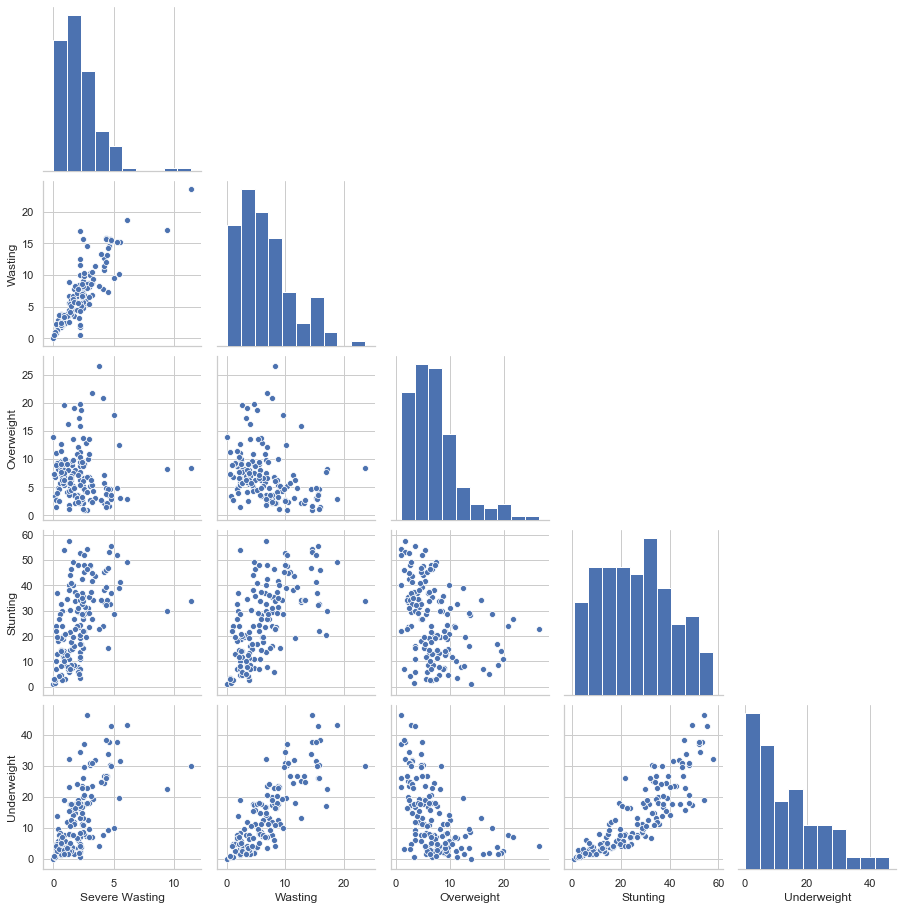

In [24]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
cols = ["Severe Wasting","Wasting","Overweight","Stunting","Underweight"]
sns.pairplot(df_country[cols], height = 2.5,corner=True )
plt.show();

**Observation**:

1)Stunting and Underweight has a Linear relationship 

2)Wasting and Underweight also exhibits Linear Relationship


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

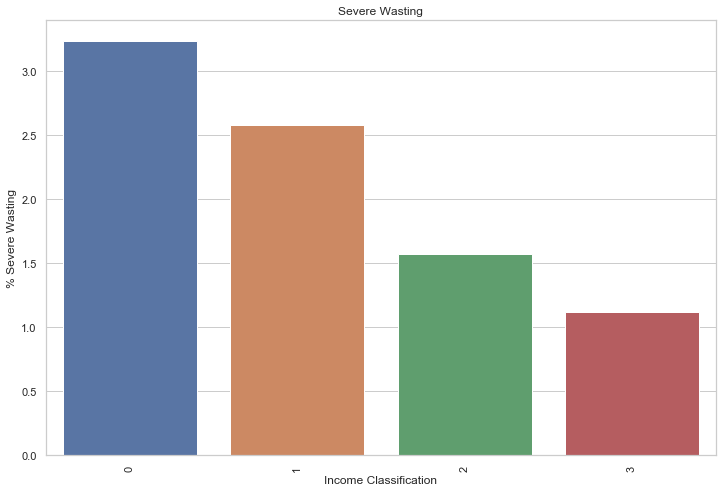

In [25]:
plt.figure(figsize=(12, 8))
x = df_country.groupby(["Income Classification"])["Severe Wasting"].mean()
sns.set(style="whitegrid")
ax = sns.barplot(x.index, x)
ax.set_title('Severe Wasting')
ax.set_ylabel('% Severe Wasting')
ax.set_xlabel('Income Classification')
plt.xticks(rotation = 90)

**Observation**:
    
1) Low-Income has High Severe Wasting% of 3-4% approx across all income Classes following up are Lower-middle-2.5%, upper-middle 1.5%,High-Income 1-2%

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

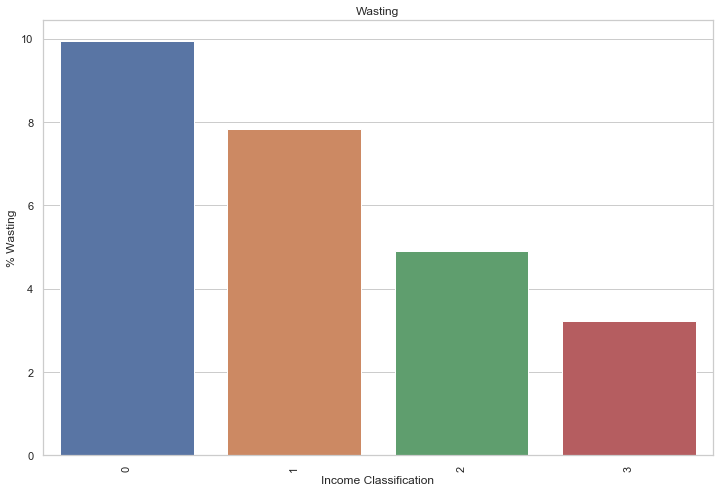

In [26]:
plt.figure(figsize=(12, 8))
x = df_country.groupby(["Income Classification"])["Wasting"].mean()
sns.set(style="whitegrid")
ax = sns.barplot(x.index, x)
ax.set_title('Wasting')
ax.set_ylabel('% Wasting')
ax.set_xlabel('Income Classification')
plt.xticks(rotation = 90)

**Observation**:
    
1) Low-Income has High  Wasting% 10%,across all income Classes following up are Lower-middle 8%, upper-middle4-5%,High-Income3% approx

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

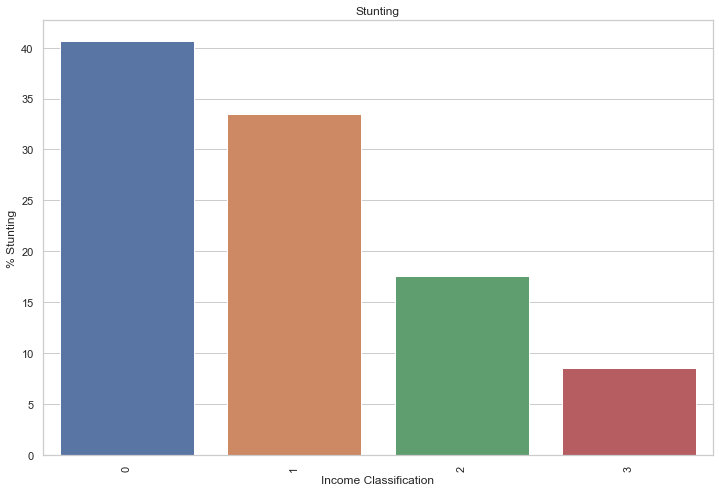

In [27]:
plt.figure(figsize=(12, 8))
x = df_country.groupby(["Income Classification"])["Stunting"].mean()
sns.set(style="whitegrid")
ax = sns.barplot(x.index, x)
ax.set_title('Stunting')
ax.set_ylabel('% Stunting')
ax.set_xlabel('Income Classification')
plt.xticks(rotation = 90)

**Observation**:
    
1) Low-Income has High  Stunting% of 40% across all income Classes following up are Lower-middle(30-35)%, upper-middle(15-20)%,High-Income(5-10)%

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

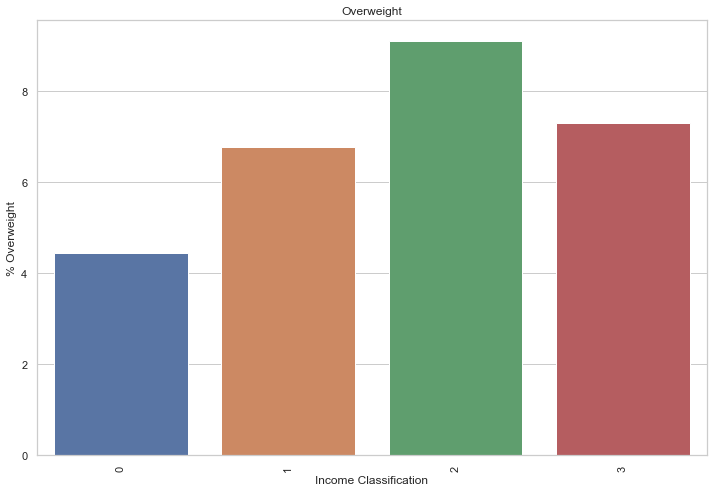

In [28]:
plt.figure(figsize=(12, 8))
x = df_country.groupby(["Income Classification"])["Overweight"].mean()
sns.set(style="whitegrid")
ax = sns.barplot(x.index, x)
ax.set_title('Overweight')
ax.set_ylabel('% Overweight')
ax.set_xlabel('Income Classification')
plt.xticks(rotation = 90)

**Observation**:
    
Upper-Middle-Income has highest Overweight % around 8-10% approx following up are High-Income with 7% and 6-8% Lower-Middle-Income of 7%, low income 4-5% approx

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

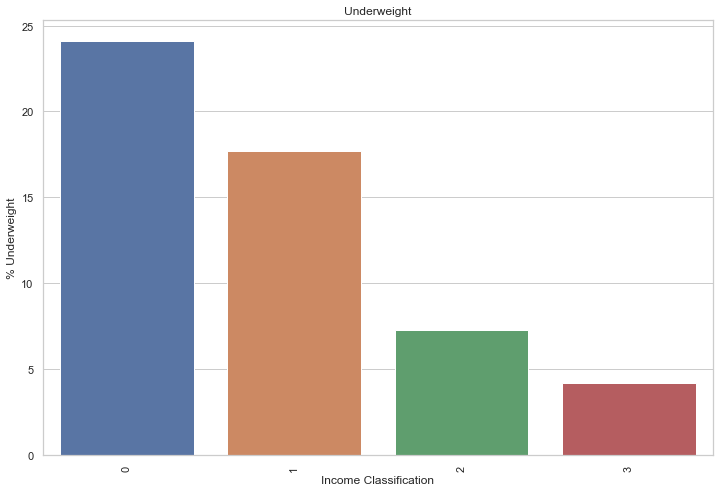

In [29]:
plt.figure(figsize=(12, 8))
x = df_country.groupby(["Income Classification"])["Underweight"].mean()
sns.set(style="whitegrid")
ax = sns.barplot(x.index, x)
ax.set_title('Underweight')
ax.set_ylabel('% Underweight')
ax.set_xlabel('Income Classification')
plt.xticks(rotation = 90)

 **Observation**:
    
Low-Income has High  Stunting% of 20-25% across all income Classes following up are Lower-middle(15-20)%, upper-middle(5-10)%,High-Income(0-5)%


 **Final Observation**:
 
1)Intrestingly , Low-Income has high Parameter % across all plots which depicts that Income is main Effect for Malnutrition levels . They have insufficient food left and live with striped Muscles

2)Overweight % is high in Upper-Middle-Income, High-Income as their income is high and as well they tend to have over-Nutrition as expected to other Incomes in terms of Quality and Saturated Fats

In [30]:
fig=df_country.groupby(['Income Classification'])[['Severe Wasting','Wasting','Overweight','Stunting','Underweight']].mean().iplot(kind='bar', asFigure=True)
fig.show()

 **Observation**:
 
 Across All Incomes Stunting% and Underweight% is dominated  more and Income wise Stunting% and Underweight% is decreasing .
 Wasting , Severe Wasting, Overweight have a variability across different Incomes

#  Box-Plots

In [31]:
def income_map(val):#Mapping 0,1,2,3 Income to respective names low,low middle, upper middle ,high income
    mapper = {0:'Low Income', 1:'Lower Middle Income', 2:'Upper Middle Income',3:'High Income'}
    return mapper[val]


In [32]:
df_country['Income level'] =df_country['Income Classification'].apply(income_map)

In [33]:

fig2 = px.box(df_country, x='Income level', y='Severe Wasting',title='Severe Wasting among different income',color='Income level', 
             color_discrete_sequence=["green", "blue", "goldenrod", "magenta"])

fig2.show()


In [34]:

fig3 = px.box(df_country, x='Income level', y='Wasting',title='Wasting among different income',color='Income level', 
             color_discrete_sequence=["green", "blue", "goldenrod", "magenta"])

fig3.show()


**Observation**:

Low income,Lower Middle Income countries tend to have a higher level of wasting. As we all know, wasting is caused by numerous factors and one of them is low energy intake. People in these countries tend to survive on less than 3 meals and hence suffer from severe malnutrition. Their bodies switched to survival mode and their muscles are striped off to preserve energy.

In [35]:
fig4 = px.box(df_country, x='Income level', y='Overweight',title='Overweight among different income',color=df_country['Income level'], 
             color_discrete_sequence=["green", "blue", "goldenrod", "magenta"])

fig4.show()

**Observation**:

Unsurprisingly, we see high level of overweight issues in high income and upper middle income countries. As more people are able to afford their meals in these countries, we will tend to see a greater level of overweight issues.

In [36]:
fig5 = px.box(df_country, x='Income level', y='Stunting',title='Stunting among different income',color=df_country['Income level'], 
             color_discrete_sequence=["green", "blue", "goldenrod", "magenta"])

fig5.show()

**Observation**:
    
Both low and lower middle income countries have high median stunting rates.Upper-Middle-Income also exhibits Medium Stunting% . 
Skewness in left of Lower-Middle-Income suggest that they are more from 10-30% countries Malnutritioned proned

In [37]:


fig6 = px.box(df_country, x=df_country['Income level'], y=df_country['Underweight'],title='Underweight among different income',color=df_country['Income level'], 
             color_discrete_sequence=["green", "blue", "goldenrod", "magenta"])

fig6.show()


**Observation**:
    
Both low and lower middle income have high rates of underweight issues.Lowe-Middle-Income Exhibits more Skewness on right which depicts an increase from 25-45% where food Take is insufficient across Lower-Middle-Income.
Upper-Middle-Income Has Outliers More in number which suggests that some countries have more Underweight% than Expected.  

In [38]:
#Plotting on the WorldMap using plotly
x1= df_country.groupby(["Country"])["Severe Wasting"].mean()


col_map1 = go.Figure(
                data=go.Choropleth(
                locations = x1.index,
                locationmode = 'country names',
                colorscale= 'portland',
                text= x1.index,
                z=x1,
                colorbar = {'title':'Severe Wasting % ', 'len':200,'lenmode':'pixels' },
                
            ), layout = go.Layout(geo=dict(bgcolor= 'rgba(255,255,255,0)',showframe=False, projection = {'type': 'natural earth'}),
                                  title = 'Severe Wasting % (South-Sudan)',
                                  
                                  titlefont = {"size": 15, "color":"White"},
                                  geo_scope='world',
                                  margin={"r":0,"t":40,"l":0,"b":0},
                                  paper_bgcolor='#000000',
                                 
                                  )
            )

col_map1.show()




In [39]:
#Plotting on the WorldMap using plotly
x2 = df_country.groupby(["Country"])["Wasting"].mean()
col_map2 = go.Figure(
                data=go.Choropleth(
                locations = x2.index,
                locationmode = 'country names',
                colorscale= 'portland',
                text= x2.index,
                z=x2,
                colorbar = {'title':' Wasting %', 'len':200,'lenmode':'pixels' },
                
            ), layout = go.Layout(geo=dict(bgcolor= 'rgba(255,255,255,0)',showframe=False, projection = {'type': 'natural earth'}),
                                  title = ' Wasting % (South-Sudan)',
                                  
                                  titlefont = {"size": 15, "color":"White"},
                                  geo_scope='world',
                                  margin={"r":0,"t":40,"l":0,"b":0},
                                  paper_bgcolor='#000000',
                                 
                                  )
            )

col_map2.show()

In [40]:
#Plotting on the WorldMap using plotly
x3 = df_country.groupby(["Country"])["Overweight"].mean()
col_map3 = go.Figure(
                data=go.Choropleth(
                locations = x3.index,
                locationmode = 'country names',
                colorscale= 'portland',
                text= x3.index,
                z=x3,
                colorbar = {'title':'Overweight %', 'len':200,'lenmode':'pixels' },
                
            ), layout = go.Layout(geo=dict(bgcolor= 'rgba(255,255,255,0)',showframe=False, projection = {'type': 'natural earth'}),
                                  title = 'Overweight % (Ukraine)',
                                  
                                  titlefont = {"size": 15, "color":"White"},
                                  geo_scope='world',
                                  margin={"r":0,"t":40,"l":0,"b":0},
                                  paper_bgcolor='#000000',
                                 
                                  )
            )

col_map3.show()

In [41]:
#Plotting on the WorldMap using plotly
x4 = df_country.groupby(["Country"])["Stunting"].mean()
col_map4= go.Figure(
                data=go.Choropleth(
                locations = x4.index,
                locationmode = 'country names',
                colorscale= 'portland',
                text= x4.index,
                z=x4,
                colorbar = {'title':'Stunting%', 'len':200,'lenmode':'pixels' },
                
            ), layout = go.Layout(geo=dict(bgcolor= 'rgba(255,255,255,0)',showframe=False, projection = {'type': 'natural earth'}),
                                  title = 'Stunting %(Bangladesh)',
                                  
                                  titlefont = {"size": 15, "color":"White"},
                                  geo_scope='world',
                                  margin={"r":0,"t":40,"l":0,"b":0},
                                  paper_bgcolor='#000000',
                                 
                                  )
            )

col_map4.show()

In [42]:
import plotly.graph_objects as go
x5 = df_country.groupby(["Country"])["Underweight"].mean()
col_map5  = go.Figure(
                data=go.Choropleth(
                locations = x5.index,
                locationmode = 'country names',
                colorscale= 'portland',
                text= x5.index,
                z=x5,
                colorbar = {'title':' Underweight %', 'len':200,'lenmode':'pixels' },
                
            ), layout = go.Layout(geo=dict(bgcolor= 'rgba(255,255,255,0)',showframe=False, projection = {'type': 'natural earth'}),
                                  title = 'Underweight % (Bangladesh)',
                                  
                                  titlefont = {"size": 15, "color":"White"},
                                  geo_scope='world',
                                  margin={"r":0,"t":40,"l":0,"b":0},
                                  paper_bgcolor='#000000',
                                 
                                  )
            )

col_map5.show()

# Most malnourished countries

In [43]:
df_country.sort_values(by=['Severe Wasting','Stunting','Wasting','Underweight','Overweight'], ascending =False).head(10)

,Country,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s),Income level
124,SOUTH SUDAN,0,11.40,23.65,8.45,33.75,30.10,1459.26,Low Income
40,DJIBOUTI,1,9.40,17.07,8.25,30.07,22.62,99.45,Lower Middle Income
61,INDIA,1,6.12,18.77,2.93,49.06,42.98,123014.49,Lower Middle Income
28,CHAD,0,5.50,15.24,3.04,41.26,31.40,2024.29,Low Income
32,COMOROS (THE),1,5.40,10.12,12.47,39.12,19.57,90.29,Lower Middle Income
149,YEMEN,0,5.30,15.24,4.84,51.90,37.79,3269.48,Low Income
129,SYRIAN ARAB REPUBLIC (THE),0,5.05,9.57,17.82,28.55,10.05,2476.21,Low Income
132,TIMOR-LESTE,1,4.78,15.62,3.65,55.38,42.80,160.44,Lower Middle Income
127,SUDAN (THE),1,4.77,15.40,2.90,36.87,29.93,5551.01,Lower Middle Income
81,MALDIVES,2,4.72,15.78,4.66,32.60,30.32,36.05,Upper Middle Income


**Observation**:
    
South Sudan , Djibouti, India are top three Malnutrioned Affected Countries. They are more Low-Income,Lower-Middle-Income across Malnutrioned Countries

# Countries which are very less affected from malnutrition

In [44]:
df_country.sort_values(by=['Severe Wasting','Stunting','Wasting','Underweight','Overweight']).head(10)

,Country,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s),Income level
6,AUSTRALIA,3,0.00,0.00,13.88,1.00,0.10,1443.07,High Income
143,UNITED STATES OF AMERICA (THE),3,0.04,0.51,7.41,2.91,0.88,20077.91,High Income
53,GERMANY,3,0.10,0.65,3.35,1.50,0.80,3641.69,High Income
108,REPUBLIC OF KOREA (THE),3,0.15,1.05,6.75,2.50,0.80,2487.10,High Income
66,JAPAN,3,0.20,2.30,1.50,7.10,3.40,5554.14,High Income
4,ARGENTINA,2,0.20,2.15,11.12,10.03,2.60,3613.65,Upper Middle Income
93,NAURU,2,0.20,1.00,2.80,24.00,4.80,1.00,Upper Middle Income
104,PERU,2,0.21,0.79,8.94,21.86,4.32,2922.84,Upper Middle Income
60,HONDURAS,1,0.28,1.83,3.90,36.86,13.79,963.02,Lower Middle Income
103,PARAGUAY,2,0.33,1.32,9.28,13.03,2.52,679.48,Upper Middle Income


**Observation**:
 Australia , USA, Germany Are less malnutrioned affected and as well High-Income Countries who can afford Three Meals per Day.  

In [45]:
app = dash.Dash()
df = px.data.tips()# Build App


body = {
    'background-color':'#000000',
    'border': '5px solid black',
    'margin': '30px',
    'box-shadow': '5px 10px',
    'color': 'white',
    'font-family': "Lucida Sans"   
    
}



fig1=df_country.groupby(['Income Classification'])[['Severe Wasting','Wasting','Overweight','Stunting','Underweight']].mean().iplot(kind='bar',asFigure=True,title='Parameter mean across Incomes')


x1 = df_country.groupby(["Country"])["Severe Wasting"].mean()
x2 = df_country.groupby(["Country"])["Wasting"].mean()
x3 = df_country.groupby(["Country"])["Overweight"].mean()
x4 = df_country.groupby(["Country"])["Stunting"].mean()
x5 = df_country.groupby(["Country"])["Underweight"].mean()



app.layout = html.Div(id='Main-div',style=body, children=[
    html.Div(
    html.H1("MALNUTRITION-COUNTRY-ESTIMATES ",
            style={'text-align': 'center','font-family':'Helvetica' })),
    
     
     dcc.Graph(figure=col_map1),
     dcc.Graph(figure=col_map2),
     dcc.Graph(figure=col_map3),
     dcc.Graph(figure=col_map4),
     dcc.Graph(figure=col_map5),
     dcc.Graph(figure=fig1),
     dcc.Graph(figure=fig2),
     dcc.Graph(figure=fig3),
     dcc.Graph(figure=fig4),
     dcc.Graph(figure=fig5),
    
    
    

])







    



In [46]:
if __name__ == '__main__':
    app.run_server(debug=True,port=8051,use_reloader=False)#debug=True,use_reloader=False

Dash is running on http://127.0.0.1:8051/

 in production, use a production WSGI server like gunicorn instead.

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
